In [1]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
csvdata = 'Food_Access_USDA.csv'
df = pd.read_csv(csvdata)
df.shape

(948, 46)

In [3]:
df.head(5)

,OBJECTID,GEOID10,NAME10,PLNG_REGION,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,...,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lahunv1,lahunv1share,GlobalID
0,1,13045910103,9101.03,ARC 20,0,0,0,0,0,1,...,0.830444,832.244207,0.165786,1212.092423,0.812939,388.429151,0.868969,30.598599,0.017656,{5550A054-FDCE-4733-8B0C-A1947228CE5D}
1,2,13045910104,9101.04,ARC 20,0,0,0,0,1,0,...,0.908498,2714.580415,0.292740,2531.804935,0.935281,613.913957,0.769316,105.395259,0.033133,{C6FF347E-7A0E-49CC-95F8-6442CAB49326}
2,3,13045910502,9105.02,ARC 20,1,1,1,1,1,0,...,0.677910,1634.143695,0.559638,394.285953,0.595598,108.874610,0.513559,141.638535,0.141497,{59E4487C-A509-45FF-95E5-D3C0BBE650BB}
3,4,13045910800,9108.00,ARC 20,0,0,0,0,0,1,...,1.000000,1557.335152,0.391881,958.000006,1.000000,491.000002,1.000000,41.470898,0.028405,{B14B7E5F-B673-439E-9C6E-638AD0B38A33}
4,5,13045910101,9101.01,ARC 20,1,1,1,1,1,0,...,0.247035,738.495538,0.124557,400.600253,0.237182,153.517815,0.282722,61.471188,0.027176,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806}


In [4]:
print(df.columns)

Index(['OBJECTID', 'GEOID10', 'NAME10', 'PLNG_REGION', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'Urban', 'Rural', 'LA1and10', 'LAhalfand10', 'LA1and20',
       'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'HUNVFlag',
       'GroupQuartersFlag', 'OHU2010', 'NUMGQTRS', 'PCTGQTRS',
       'LowIncomeTracts', 'POP2010', 'UATYP10', 'lapophalf', 'lapophalfshare',
       'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare',
       'laseniorshalf', 'laseniorshalfshare', 'lahunvhalf', 'lahunvhalfshare',
       'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1',
       'lakids1share', 'laseniors1', 'laseniors1share', 'lahunv1',
       'lahunv1share', 'GlobalID'],
      dtype='object')


In [5]:
kids_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","lakidshalf","lakidshalfshare","lakids1","lakids1share","GlobalID","lalowi1","lalowi1share","lapop1","lapop1share"}]
kids_df

,NAME10,lapop1,GEOID10,lakidshalfshare,lapop1share,lalowi1,lakids1,PLNG_REGION,Urban,GlobalID,lakidshalf,lakids1share,lalowi1share
0,9101.03,4168.828564,13045910103,0.892140,0.830444,832.244207,1212.092423,ARC 20,0,{5550A054-FDCE-4733-8B0C-A1947228CE5D},1330.181374,0.812939,0.165786
1,9101.04,8424.506346,13045910104,0.969294,0.908498,2714.580415,2531.804935,ARC 20,1,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},2623.877557,0.935281,0.292740
2,9105.02,1979.496369,13045910502,0.992790,0.677910,1634.143695,394.285953,ARC 20,1,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},657.226749,0.595598,0.559638
3,9108.00,3974.000026,13045910800,1.000000,1.000000,1557.335152,958.000006,ARC 20,0,{B14B7E5F-B673-439E-9C6E-638AD0B38A33},958.000006,1.000000,0.391881
4,9101.01,1464.668253,13045910101,0.744221,0.247035,738.495538,400.600253,ARC 20,1,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},1256.990076,0.237182,0.124557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1201.02,7620.260307,13223120102,0.931305,0.676094,1293.902235,2519.536417,ARC 20,1,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},3428.134246,0.684471,0.114799
944,1201.03,6703.747686,13223120103,0.917964,0.782508,1193.293010,2118.691044,ARC 20,0,{CE73A80F-F658-48FD-91D0-A2B9D66ED1CC},2550.102779,0.762668,0.139289
945,1203.02,5505.013546,13223120302,0.886995,0.462762,2065.519935,1449.743154,ARC 20,1,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},2917.327602,0.440785,0.173631
946,1202.02,5005.805781,13223120202,0.928530,0.699428,1633.867000,1518.259609,ARC 20,1,{36EAEB99-E656-4E24-97EC-2B747DA7D1BC},1910.915240,0.737735,0.228289


In [6]:
# Low income vs non low income
low_income_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","LowIncomeTracts","lalowihalf","lalowihalfshare","lalowi1","lalowi1share","GlobalID","lapop1","POP2010","lakids1","laseniors1"}]
low_income_df=low_income_df.rename(columns={"PLNG_REGION": "Metro_Atlanta", 
                                            "GlobalID": "Global_ID",
                                            "LowIncomeTracts": "Income_Level", 
                                            "lalowihalf": "LowAcces_LowIncome.5miles", 
                                            "lalowi1share": "LowAccess_LowIncome1mile%", 
                                            "lalowihalfshare": "LowAccess_LowIncome.5miles%", 
                                            "lalowi1": "LowAccess_LowIncome1mile", 
                                            "GEOID10": "Geo_ID", 
                                            "NAME10": "Name",
                                            "lakids1": "LowAccess_Kids1Mile",
                                            "laseniors1":"LowAccess_Seniors1Mile",
                                            "lapop1":"LowAccess_1Mile",
                                            "POP2010": "Total_Pop"})
# Drop stuff from dataframe
# This drops all 0 values from "Urban"
low_income_df = low_income_df.loc[(low_income_df["Urban"] != 0) & (low_income_df["Metro_Atlanta"] == "ARC 10")]
low_income_df
# Change values in dataframe
# for col in low_income_df.columns():
low_income_df.loc[low_income_df["Income_Level"] == 0, "Income_Level"] = "Not Low Income"
low_income_df.loc[low_income_df["Income_Level"] == 1, "Income_Level"] = "Low Income" 

# low_income_df.Income_Level = low_income_df.Income_Level.map({ 0 : "Not Low Income", 1 : "Low Income"})

# low_income_df.replace({'Income_Level':{0:"Not Low Income",1:"Low Income"}},inplace=True)
low_income_df
df_high=low_income_df[(low_income_df["Income_Level"] == "Not Low Income")]
df_low=low_income_df[(low_income_df["Income_Level"] == "Low Income")]


Total Population: 3,907,025
Total Low Access Population: 1,493,967


,"Low Access, Low Income (% of Pop.)","Low Access, Not Low Income (% of Pop.)"
Kids (age 0-17),2.45,8.22
Adults (age 18-64),5.66,18.66
Seniors (age 65+),0.59,2.66


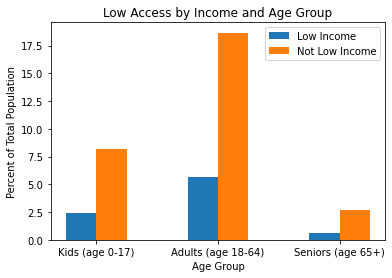

In [7]:
total_pop=low_income_df['Total_Pop'].sum()
total_la1=(df_low["LowAccess_1Mile"].sum()/total_pop)*100
total_la2=(df_high["LowAccess_1Mile"].sum()/total_pop)*100
kids_pop=(df_low["LowAccess_Kids1Mile"].sum()/total_pop)*100
kids_pop2=(df_high["LowAccess_Kids1Mile"].sum()/total_pop)*100
seniors_pop=(df_low["LowAccess_Seniors1Mile"].sum()/total_pop)*100
seniors_pop2=(df_high["LowAccess_Seniors1Mile"].sum()/total_pop)*100
adult_pop=total_la1-kids_pop-seniors_pop
adult_pop2=total_la2-kids_pop2-seniors_pop2

y1=[kids_pop,adult_pop,seniors_pop]
y2=[kids_pop2,adult_pop2,seniors_pop2]

barWidth = 0.25
xpos1 = np.arange(len(y1))
xpos2 = [x + barWidth for x in xpos1]

plt.bar(xpos1,y1, width=barWidth, label = "Low Income")
plt.bar(xpos2,y2, width=barWidth, label = "Not Low Income")
xgroups=["Kids (age 0-17)","Adults (age 18-64)","Seniors (age 65+)"]

plt.title("Low Access by Income and Age Group")
plt.xlabel("Age Group")
plt.xticks([r + (barWidth/2) for r in range(len(y1))], xgroups)
plt.ylabel("Percent of Total Population")
plt.legend()
plt.savefig('Chart Images/total.png')

age_table=pd.DataFrame({"Low Access, Low Income (% of Pop.)": map(lambda n: "%.2f" % n,y1),
                        "Low Access, Not Low Income (% of Pop.)":map(lambda n: "%.2f" % n,y2)},
                      index=xgroups)
print(f"Total Population: {total_pop:,}")
print(f"Total Low Access Population: {low_income_df['LowAccess_1Mile'].sum():,.0f}")
age_table


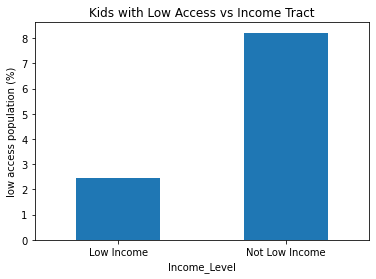

In [8]:
kids_df=low_income_df.copy()
kids_df.loc[kids_df['Income_Level'] == 0, 'LowIncomeTracts'] = 'Not Low Income'
kids_df.loc[kids_df['Income_Level'] == 1, 'LowIncomeTracts'] = 'Low Income'
income_groups = kids_df.groupby('Income_Level')

lowincome_sum = income_groups['LowAccess_1Mile'].sum()
kids_sum = (income_groups['LowAccess_Kids1Mile'].sum()/(total_pop))*100
kids_sum.plot(kind= 'bar', ylabel= 'low access population (%)', title= 'Kids with Low Access vs Income Tract', rot = 0)
plt.savefig('Chart Images/Kids_sum.png')

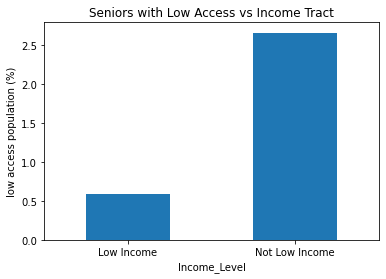

In [9]:
seniors_df=low_income_df.copy()
seniors_df.loc[seniors_df['Income_Level'] == 0, 'LowIncomeTracts'] = 'Not Low Income'
seniors_df.loc[seniors_df['Income_Level'] == 1, 'LowIncomeTracts'] = 'Low Income'
income_groups = seniors_df.groupby('Income_Level')

lowincome_sum = income_groups['LowAccess_1Mile'].sum()
seniors_sum = (income_groups['LowAccess_Seniors1Mile'].sum()/(total_pop))*100
seniors_sum.plot(kind= 'bar', ylabel= 'low access population (%)', title= 'Seniors with Low Access vs Income Tract', rot = 0)
#plt.show()
plt.savefig('Chart Images/Seniors_sum.png')

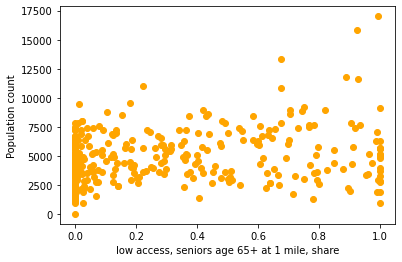

In [10]:
df.loc[(df['PLNG_REGION'] == 'ARC 10') & (df['Urban'] == 1)]

seniors_df = df[{'POP2010', 'PLNG_REGION', 'Urban', 'laseniorshalf', 'laseniorshalfshare','laseniors1','laseniors1share','GlobalID','lalowi1','lalowi1share','lapop1','lapop1share', 'LowIncomeTracts' }]

seniors_df_low = seniors_df[(df['LowIncomeTracts'] == 1)]
seniors_df_high = seniors_df[(df['LowIncomeTracts'] == 0)]

x_low = seniors_df_low['laseniors1share']
y_low = seniors_df_low['POP2010']

seniorsplt = plt.scatter(x_low, y_low, color = 'orange')
plt.xlabel('low access, seniors age 65+ at 1 mile, share')
plt.ylabel('Population count')
plt.show()

In [11]:
# Low income vs non low income

low_income_df = df[{"GEOID10","NAME10","PLNG_REGION","Urban","LowIncomeTracts","lalowihalf","lalowihalfshare","lalowi1","lalowi1share","GlobalID","lapop1","POP2010","lapophalf","lapophalfshare","lapop1","lapop1share"}]
low_income_df

,NAME10,LowIncomeTracts,lalowi1share,GEOID10,lapop1,lapop1share,lalowi1,lapophalf,lalowihalfshare,PLNG_REGION,POP2010,Urban,GlobalID,lapophalfshare,lalowihalf
0,9101.03,0,0.165786,13045910103,4168.828564,0.830444,832.244207,4560.050754,0.184989,ARC 20,5020,0,{5550A054-FDCE-4733-8B0C-A1947228CE5D},0.908377,928.643255
1,9101.04,0,0.292740,13045910104,8424.506346,0.908498,2714.580415,8923.358003,0.309831,ARC 20,9273,1,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},0.962295,2873.063683
2,9105.02,1,0.559638,13045910502,1979.496369,0.677910,1634.143695,2903.442168,0.817848,ARC 20,2920,1,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},0.994330,2388.115731
3,9108.00,1,0.391881,13045910800,3974.000026,1.000000,1557.335152,3974.000026,0.391881,ARC 20,3974,0,{B14B7E5F-B673-439E-9C6E-638AD0B38A33},1.000000,1557.335152
4,9101.01,1,0.124557,13045910101,1464.668253,0.247035,738.495538,4519.483605,0.365078,ARC 20,5929,1,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},0.762267,2164.547997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1201.02,0,0.114799,13223120102,7620.260307,0.676094,1293.902235,10475.236040,0.160460,ARC 20,11271,1,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},0.929397,1808.542071
944,1201.03,0,0.139289,13223120103,6703.747686,0.782508,1193.293010,7914.940175,0.160347,ARC 20,8567,0,{CE73A80F-F658-48FD-91D0-A2B9D66ED1CC},0.923887,1373.688844
945,1203.02,0,0.173631,13223120302,5505.013546,0.462762,2065.519935,10591.961290,0.352241,ARC 20,11896,1,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},0.890380,4190.258936
946,1202.02,0,0.228289,13223120202,5005.805781,0.699428,1633.867000,6553.704673,0.314849,ARC 20,7157,1,{36EAEB99-E656-4E24-97EC-2B747DA7D1BC},0.915706,2253.373996


In [12]:
# Rename columns
low_income_df=low_income_df.rename(columns={"PLNG_REGION": "Metro_Atlanta", 
                                            "GlobalID": "Global_ID",
                                            "LowIncomeTracts": "Income_Level", 
                                            "lalowihalf": "LowAcces_LowIncome05miles", 
                                            "lalowi1share": "LowAccess_LowIncome1milePRCT", 
                                            "lalowihalfshare": "LowAccess_LowIncome05milesPRCT", 
                                            "lalowi1": "LowAccess_LowIncome1mile", 
                                            "GEOID10": "Geo_ID", 
                                            "NAME10": "Name", 
                                            "lapophalfshare":"Low_Access_Population_half_share", 
                                            "lapop1":"Low_Access_Population_1", 
                                            "lapophalf":"Low_Access_Population_half", 
                                            "lapop1share": "Low_Access_Population_1_share" })
low_income_df

,Name,Income_Level,LowAccess_LowIncome1milePRCT,Geo_ID,Low_Access_Population_1,Low_Access_Population_1_share,LowAccess_LowIncome1mile,Low_Access_Population_half,LowAccess_LowIncome05milesPRCT,Metro_Atlanta,POP2010,Urban,Global_ID,Low_Access_Population_half_share,LowAcces_LowIncome05miles
0,9101.03,0,0.165786,13045910103,4168.828564,0.830444,832.244207,4560.050754,0.184989,ARC 20,5020,0,{5550A054-FDCE-4733-8B0C-A1947228CE5D},0.908377,928.643255
1,9101.04,0,0.292740,13045910104,8424.506346,0.908498,2714.580415,8923.358003,0.309831,ARC 20,9273,1,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},0.962295,2873.063683
2,9105.02,1,0.559638,13045910502,1979.496369,0.677910,1634.143695,2903.442168,0.817848,ARC 20,2920,1,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},0.994330,2388.115731
3,9108.00,1,0.391881,13045910800,3974.000026,1.000000,1557.335152,3974.000026,0.391881,ARC 20,3974,0,{B14B7E5F-B673-439E-9C6E-638AD0B38A33},1.000000,1557.335152
4,9101.01,1,0.124557,13045910101,1464.668253,0.247035,738.495538,4519.483605,0.365078,ARC 20,5929,1,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},0.762267,2164.547997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1201.02,0,0.114799,13223120102,7620.260307,0.676094,1293.902235,10475.236040,0.160460,ARC 20,11271,1,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},0.929397,1808.542071
944,1201.03,0,0.139289,13223120103,6703.747686,0.782508,1193.293010,7914.940175,0.160347,ARC 20,8567,0,{CE73A80F-F658-48FD-91D0-A2B9D66ED1CC},0.923887,1373.688844
945,1203.02,0,0.173631,13223120302,5505.013546,0.462762,2065.519935,10591.961290,0.352241,ARC 20,11896,1,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},0.890380,4190.258936
946,1202.02,0,0.228289,13223120202,5005.805781,0.699428,1633.867000,6553.704673,0.314849,ARC 20,7157,1,{36EAEB99-E656-4E24-97EC-2B747DA7D1BC},0.915706,2253.373996


In [52]:
# Drop stuff from dataframe
# This drops all 0 values from "Urban"
low_income_df = low_income_df[low_income_df.Urban != 0]
low_income_df
# Change values in dataframe
# for col in low_income_df.columns():
# low_income_df.loc[low_income_df["Income_Level"] == '0', "Income_Level"] = "Not Low Income"
# low_income_df.loc[low_income_df["Income_Level"] == '1', "Income_Level"] = "Low Income" 

# low_income_df.Income_Level = low_income_df.Income_Level.map({ 0 : "Not Low Income", 1 : "Low Income"})

low_income_df.replace({'Income_Level':{0:"Not Low Income",1:"Low Income"}},inplace=True)
low_income_df

C:\Users\Mehdi\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Low_Access_Population_1,Low_Access_Population_1_share,LowAccess_LowIncome05milesPRCT,Urban,Geo_ID,Income_Level,Name,Low_Access_Population_half,Low_Access_Population_half_share,LowAccess_LowIncome1milePRCT,Global_ID,POP2010,LowAcces_LowIncome05miles,LowAccess_LowIncome1mile,Metro_Atlanta
1,8424.506346,0.908498,0.309831,1,13045910104,Not Low Income,9101.04,8923.358003,0.962295,0.292740,{C6FF347E-7A0E-49CC-95F8-6442CAB49326},9273,2873.063683,2714.580415,ARC 20
2,1979.496369,0.677910,0.817848,1,13045910502,Low Income,9105.02,2903.442168,0.994330,0.559638,{59E4487C-A509-45FF-95E5-D3C0BBE650BB},2920,2388.115731,1634.143695,ARC 20
4,1464.668253,0.247035,0.365078,1,13045910101,Low Income,9101.01,4519.483605,0.762267,0.124557,{C3D7DA7F-5468-4F0E-A705-CA99B9E57806},5929,2164.547997,738.495538,ARC 20
5,9346.658357,0.796952,0.296743,1,13045910200,Not Low Income,9102.00,11061.713870,0.943188,0.250140,{68A7D1D7-2258-4893-A214-168B6A59D4C3},11728,3480.197243,2933.637950,ARC 20
8,4149.583895,0.593561,0.396789,1,13045911100,Low Income,9111.00,6293.834842,0.900277,0.275507,{FBD6B0EB-0998-41C8-8281-2DF74B210199},6991,2773.954538,1926.070755,ARC 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,3242.762370,0.507872,0.260394,1,13223120204,Not Low Income,1202.04,5835.260017,0.913901,0.134235,{598AD0FB-AF93-4548-8636-800E766068F8},6385,1662.615257,857.091210,ARC 20
942,1270.629835,0.711041,0.026200,1,13223120303,Not Low Income,1203.03,1600.837970,0.895824,0.020795,{39429434-7228-49F6-A951-7DA25E80FD41},1787,46.818658,37.161278,ARC 20
943,7620.260307,0.676094,0.160460,1,13223120102,Not Low Income,1201.02,10475.236040,0.929397,0.114799,{71987763-5C58-49E8-9DAE-B5F3E2E7E2DA},11271,1808.542071,1293.902235,ARC 20
945,5505.013546,0.462762,0.352241,1,13223120302,Not Low Income,1203.02,10591.961290,0.890380,0.173631,{7CDED240-5D75-436B-BE4F-72E9E82FDD33},11896,4190.258936,2065.519935,ARC 20


In [53]:
# Drop GeoID and GlobalID colmns
low_income_clean_df = low_income_df[{"Metro_Atlanta",
                                     "Income_Level",
                                     "LowAcces_LowIncome05miles",
                                     "LowAccess_LowIncome1milePRCT",
                                     "LowAccess_LowIncome05milesPRCT",
                                     "POP2010",
                                     "Low_Access_Population_half",
                                     "Low_Access_Population_half_share",
                                     "Low_Access_Population_1",
                                     "Low_Access_Population_1_share"}]

# low_income_clean_df
# Drop ARC 20
# low_income_clean_df.drop(low_income_clean_df.index[low_income_clean_df['Metro_Atlanta'] == 'Arc 20'], inplace = True)
low_income_clean_df = low_income_clean_df[low_income_clean_df.Metro_Atlanta != 'ARC 20']
# low_income_clean_df

# Round out all numbers 
# low_income_clean_df.round({'LowAcces_LowIncome.5miles': 1, 'lapop1': 0})
# low_income_clean_df.LowAcces_LowIncome05miles.apply(np.round)
low_income_clean_df.LowAcces_LowIncome05miles = low_income_clean_df.LowAcces_LowIncome05miles.round(2)
low_income_clean_df.Low_Access_Population_1 = low_income_clean_df.Low_Access_Population_1.round()
low_income_clean_df.Low_Access_Population_half = low_income_clean_df.Low_Access_Population_half.round()
low_income_clean_df.Low_Access_Population_1_share = low_income_clean_df.Low_Access_Population_1_share.round(3)
#low_income_clean_df.lapophalfshare = low_income_clean_df.lapophalfshare.round(3)
# # round %s
low_income_clean_df.LowAccess_LowIncome1milePRCT = low_income_clean_df.LowAccess_LowIncome1milePRCT.map("{:.2%}".format)
low_income_clean_df.LowAccess_LowIncome05milesPRCT = low_income_clean_df.LowAccess_LowIncome05milesPRCT.map("{:.2%}".format)
low_income_clean_df.Low_Access_Population_half_share = low_income_clean_df.Low_Access_Population_half_share.map("{:.2%}".format)
low_income_clean_df.Low_Access_Population_1_share = low_income_clean_df.Low_Access_Population_1_share.map("{:.2%}".format)
# # low_income_clean_df

# Change the % into % values
# low_income_clean_df_pct = low_income_clean_df/low_income_clean_df[low_income_clean_df.columns].sum()*100
# low_income_clean_df['percent'] = (low_income_clean_df['LowAccess_LowIncome05milesPRCT'] / low_income_clean_df['LowAccess_LowIncome05milesPRCT'].sum()) * 100
# low_income_clean_df.LowAccess_LowIncome1milePRCT = (low_income_clean_df.LowAccess_LowIncome1milePRCT * 100).astype(str) + '%'
# low_income_clean_df.LowAccess_LowIncome05milesPRCT = (low_income_clean_df.LowAccess_LowIncome05milesPRCT * 100).astype(str) + '%'
# low_income_clean_df.lapophalfshare = (low_income_clean_df.lapophalfshare * 100).astype(str) + '%'
# low_income_clean_df.lapop1share = (low_income_clean_df.lapop1share * 100).astype(str) + '%'
# low_income_clean_df

# Round all the percents
# low_income_clean_df.LowAccess_LowIncome1milePRCT = low_income_clean_df.LowAccess_LowIncome1milePRCT.round()
# low_income_clean_df.LowAccess_LowIncome05milesPRCT = low_income_clean_df.LowAccess_LowIncome05milesPRCT.round()
# low_income_clean_df.lapophalfshare = low_income_clean_df.lapophalfshare.round()
# low_income_clean_df.lapop1share = low_income_clean_df.lapop1share.round()
low_income_clean_df







,Low_Access_Population_1_share,Low_Access_Population_half_share,LowAccess_LowIncome05milesPRCT,Income_Level,LowAccess_LowIncome1milePRCT,Low_Access_Population_1,Low_Access_Population_half,POP2010,LowAcces_LowIncome05miles,Metro_Atlanta
17,56.20%,85.67%,2.50%,Not Low Income,1.48%,3105.0,4737.0,5530,138.04,ARC 10
18,42.20%,84.75%,13.04%,Not Low Income,6.85%,3252.0,6537.0,7713,1006.02,ARC 10
19,41.80%,87.57%,11.58%,Not Low Income,5.71%,1901.0,3984.0,4550,526.74,ARC 10
20,55.90%,85.39%,15.85%,Not Low Income,11.53%,3217.0,4916.0,5757,912.25,ARC 10
22,100.00%,100.00%,12.72%,Not Low Income,12.72%,3239.0,3239.0,3239,411.91,ARC 10
...,...,...,...,...,...,...,...,...,...,...
904,87.90%,99.40%,15.79%,Not Low Income,13.49%,6260.0,7076.0,7119,1124.20,ARC 10
905,22.80%,74.13%,24.10%,Not Low Income,6.27%,1914.0,6210.0,8376,2018.36,ARC 10
907,78.90%,96.36%,17.93%,Not Low Income,15.07%,5667.0,6919.0,7180,1287.42,ARC 10
908,88.10%,97.98%,11.79%,Not Low Income,10.81%,10628.0,11822.0,12065,1422.11,ARC 10


In [54]:
# # Drop GeoID and GlobalID colmns
# low_income_clean_df = low_income_df[{"Metro_Atlanta","Income_Level","LowAcces_LowIncome05miles","LowAccess_LowIncome1milePRCT","LowAccess_LowIncome05milesPRCT","POP2010","lapophalf","lapophalfshare","lapop1","lapop1share"}]
# # low_income_clean_df
# # Drop ARC 20
# # low_income_clean_df.drop(low_income_clean_df.index[low_income_clean_df['Metro_Atlanta'] == 'Arc 20'], inplace = True)
# low_income_clean_df = low_income_clean_df[low_income_clean_df.Metro_Atlanta != 'ARC 20']
# low_income_clean_df.LowAccess_LowIncome05milesPRCT = low_income_clean_df.LowAccess_LowIncome05milesPRCT.map("{:.2%}".format)
# low_income_clean_df.lapophalfshare = low_income_clean_df.lapophalfshare.map("{:.2%}".format)
# low_income_clean_df


In [55]:
#Create dataframe to have information for not low income and low income
income_table = low_income_clean_df.groupby(['Income_Level'])

low_access_1 = income_table["Low_Access_Population_1"].sum()
low_access_half = income_table["Low_Access_Population_half"].sum()

income_df = pd.DataFrame ({"Low Access population 0.5 miles" : low_access_half, 
                           "Low Access population 1 mile" : low_access_1})

#print dataframe
income_df


,Low Access population 0.5 miles,Low Access population 1 mile
Income_Level,,
Low Income,904481.0,339785.0
Not Low Income,2092987.0,1154182.0


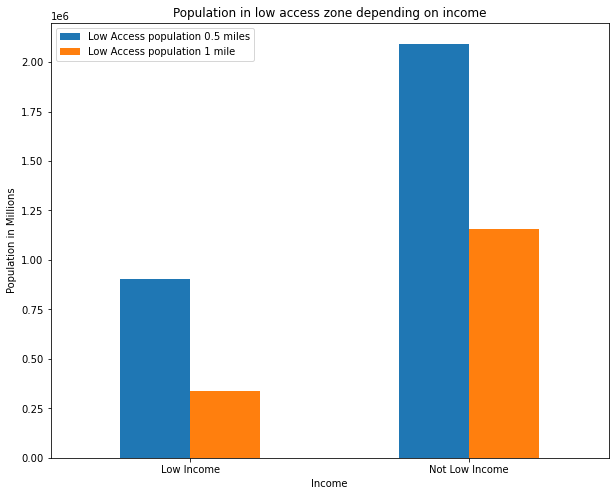

In [56]:
#Create bar plot 
#Create x_axis values
income_df.plot(kind="bar", figsize=(10,8))

#Add title and labels
plt.title("Population in low access zone depending on income")
plt.xlabel("Income")
plt.ylabel("Population in Millions")
plt.xticks(rotation=0)

#show graphic
#plt.show()

#save image
plt.savefig('Chart Images/Plot_income.png')

In [57]:
#Create dataframe for scatter plot

income_relation_table = low_income_clean_df["Income_Level"]
income_relation_df = pd.DataFrame(income_relation_table)

income_relation_df["Low Access"] = low_income_clean_df["Low_Access_Population_1"] + low_income_clean_df["Low_Access_Population_half"]
income_relation_df



,Income_Level,Low Access
17,Not Low Income,7842.0
18,Not Low Income,9789.0
19,Not Low Income,5885.0
20,Not Low Income,8133.0
22,Not Low Income,6478.0
...,...,...
904,Not Low Income,13336.0
905,Not Low Income,8124.0
907,Not Low Income,12586.0
908,Not Low Income,22450.0


In [58]:
income_total_df = pd.DataFrame(income_relation_df.groupby("Income_Level").sum()['Low Access']) 
income_total_df

,Low Access
Income_Level,
Low Income,1244266.0
Not Low Income,3247169.0


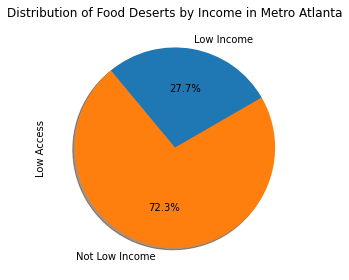

In [59]:
# Generate a pie plot showing the distribution of low income vs not low income

labels = income_total_df.index.values
income_total_df.plot(kind="pie", y="Low Access", autopct="%1.1f%%", startangle = 30, shadow=True, labels= labels, legend=False)

#Add title
plt.title("Distribution of Food Deserts by Income in Metro Atlanta")

#show graphic
#plt.show()
plt.tight_layout()

#save image
plt.savefig('Chart Images/Food_deserts.png')

In [60]:
stores_df = df[{"NAME10","Urban","PLNG_REGION","LILATracts_1And10","LILATracts_halfAnd10","LA1and10","LAhalfand10","LA1and20","LATracts_half","LATracts1","LATracts10","LATracts20","LowIncomeTracts","POP2010","lapophalf","lapophalfshare","lalowihalf","lalowihalfshare","lapop1","lapop1share","lalowi1","lalowi1share","OHU2010", "lahunv1", "lahunv1share"}]
stores_df

,OHU2010,lapop1,LATracts1,lapop1share,LAhalfand10,LATracts20,Urban,lahunv1,POP2010,lalowi1,...,LILATracts_1And10,lapophalf,lapophalfshare,lalowihalf,PLNG_REGION,lalowihalfshare,LowIncomeTracts,NAME10,lahunv1share,LATracts_half
0,1733,4168.828564,1,0.830444,0,0,0,30.598599,5020,832.244207,...,0,4560.050754,0.908377,928.643255,ARC 20,0.184989,0,9101.03,0.017656,1
1,3181,8424.506346,1,0.908498,1,0,1,105.395259,9273,2714.580415,...,0,8923.358003,0.962295,2873.063683,ARC 20,0.309831,0,9101.04,0.033133,1
2,1001,1979.496369,1,0.677910,1,0,1,141.638535,2920,1634.143695,...,1,2903.442168,0.994330,2388.115731,ARC 20,0.817848,1,9105.02,0.141497,1
3,1460,3974.000026,1,1.000000,0,0,0,41.470898,3974,1557.335152,...,0,3974.000026,1.000000,1557.335152,ARC 20,0.391881,1,9108.00,0.028405,1
4,2262,1464.668253,1,0.247035,1,0,1,61.471188,5929,738.495538,...,1,4519.483605,0.762267,2164.547997,ARC 20,0.365078,1,9101.01,0.027176,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,3477,7620.260307,1,0.676094,1,0,1,23.289431,11271,1293.902235,...,0,10475.236040,0.929397,1808.542071,ARC 20,0.160460,0,1201.02,0.006698,1
944,2769,6703.747686,1,0.782508,0,0,0,0.000000,8567,1193.293010,...,0,7914.940175,0.923887,1373.688844,ARC 20,0.160347,0,1201.03,0.000000,1
945,4503,5505.013546,1,0.462762,1,0,1,97.613907,11896,2065.519935,...,0,10591.961290,0.890380,4190.258936,ARC 20,0.352241,0,1203.02,0.021678,1
946,2512,5005.805781,1,0.699428,1,0,1,54.220317,7157,1633.867000,...,0,6553.704673,0.915706,2253.373996,ARC 20,0.314849,0,1202.02,0.021585,1


In [61]:
#Rename columns for stores_df
stores_df = stores_df.rename(columns={"PLNG_REGION": "Metro_Atlanta", 
                                      "GlobalID": "Global_ID",
                                      "LowIncomeTracts": "Income_Level", 
                                      "lalowihalf": "LowAcces_LowIncome05miles", 
                                      "lalowi1share": "LowAccess_LowIncome1milePRCT", 
                                      "lalowihalfshare": "LowAccess_LowIncome05milesPRCT", 
                                      "lalowi1": "LowAccess_LowIncome1mile", 
                                      "GEOID10": "Geo_ID", 
                                      "NAME10": "Name", 
                                      "lahunv1": "NoCar LowAccess1mile",
                                     "lahunv1share": "NoCar LowAccess1mile Share"})
#Checking that rename worked
stores_df["NoCar LowAccess1mile"]

0       30.598599
1      105.395259
2      141.638535
3       41.470898
4       61.471188
          ...    
943     23.289431
944      0.000000
945     97.613907
946     54.220317
947     63.348930
Name: NoCar LowAccess1mile, Length: 948, dtype: float64

In [62]:

#Filtering data to only show urban areas and creating new df
urban_stores = stores_df.loc[(stores_df["Urban"]==1) & (stores_df["Metro_Atlanta"] == "ARC 10")]
urban_stores

,OHU2010,lapop1,LATracts1,lapop1share,LAhalfand10,LATracts20,Urban,NoCar LowAccess1mile,POP2010,LowAccess_LowIncome1mile,...,LILATracts_1And10,lapophalf,lapophalfshare,LowAcces_LowIncome05miles,Metro_Atlanta,LowAccess_LowIncome05milesPRCT,Income_Level,Name,NoCar LowAccess1mile Share,LATracts_half
17,2208,3105.415489,1,0.561558,1,0,1,8.782476,5530,81.874532,...,0,4737.417269,0.856676,138.037981,ARC 10,0.024962,0,1402.07,0.003978,1
18,2749,3251.804581,1,0.421600,1,0,1,11.681039,7713,528.048979,...,0,6536.637064,0.847483,1006.024462,ARC 10,0.130432,0,1402.08,0.004249,1
19,1702,1900.698065,1,0.417736,1,0,1,20.318478,4550,259.816848,...,0,3984.209043,0.875650,526.739981,ARC 10,0.115767,0,1403.03,0.011938,1
20,2231,3217.267229,1,0.558844,1,0,1,9.131079,5757,663.866800,...,0,4915.826453,0.853887,912.247186,ARC 10,0.158459,0,1403.04,0.004093,1
22,1095,3238.999945,1,1.000000,1,0,1,10.499310,3239,411.910983,...,0,3238.999945,1.000000,411.910983,ARC 10,0.127172,0,1404.08,0.009588,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2489,6260.021520,1,0.879340,1,0,1,35.743917,7119,960.080472,...,0,7076.423269,0.994019,1124.195803,ARC 10,0.157915,0,909.01,0.014361,1
905,2742,1913.503440,1,0.228451,1,0,1,16.967492,8376,525.380600,...,0,6209.508730,0.741345,2018.364617,ARC 10,0.240970,0,906.02,0.006188,1
907,2597,5667.255401,1,0.789311,1,0,1,20.991483,7180,1082.336118,...,0,6918.774120,0.963618,1287.420219,ARC 10,0.179306,0,907.02,0.008083,1
908,4147,10627.521800,1,0.880856,1,0,1,21.956449,12065,1303.824461,...,0,11821.714200,0.979835,1422.106088,ARC 10,0.117870,0,905.02,0.005295,1


In [63]:
#Replacing values in income level with categorical names instead of integers
urban_stores.replace({'Income_Level':{0:"Not Low Income",1:"Low Income"}},inplace=True)
urban_stores

C:\Users\Mehdi\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,OHU2010,lapop1,LATracts1,lapop1share,LAhalfand10,LATracts20,Urban,NoCar LowAccess1mile,POP2010,LowAccess_LowIncome1mile,...,LILATracts_1And10,lapophalf,lapophalfshare,LowAcces_LowIncome05miles,Metro_Atlanta,LowAccess_LowIncome05milesPRCT,Income_Level,Name,NoCar LowAccess1mile Share,LATracts_half
17,2208,3105.415489,1,0.561558,1,0,1,8.782476,5530,81.874532,...,0,4737.417269,0.856676,138.037981,ARC 10,0.024962,Not Low Income,1402.07,0.003978,1
18,2749,3251.804581,1,0.421600,1,0,1,11.681039,7713,528.048979,...,0,6536.637064,0.847483,1006.024462,ARC 10,0.130432,Not Low Income,1402.08,0.004249,1
19,1702,1900.698065,1,0.417736,1,0,1,20.318478,4550,259.816848,...,0,3984.209043,0.875650,526.739981,ARC 10,0.115767,Not Low Income,1403.03,0.011938,1
20,2231,3217.267229,1,0.558844,1,0,1,9.131079,5757,663.866800,...,0,4915.826453,0.853887,912.247186,ARC 10,0.158459,Not Low Income,1403.04,0.004093,1
22,1095,3238.999945,1,1.000000,1,0,1,10.499310,3239,411.910983,...,0,3238.999945,1.000000,411.910983,ARC 10,0.127172,Not Low Income,1404.08,0.009588,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2489,6260.021520,1,0.879340,1,0,1,35.743917,7119,960.080472,...,0,7076.423269,0.994019,1124.195803,ARC 10,0.157915,Not Low Income,909.01,0.014361,1
905,2742,1913.503440,1,0.228451,1,0,1,16.967492,8376,525.380600,...,0,6209.508730,0.741345,2018.364617,ARC 10,0.240970,Not Low Income,906.02,0.006188,1
907,2597,5667.255401,1,0.789311,1,0,1,20.991483,7180,1082.336118,...,0,6918.774120,0.963618,1287.420219,ARC 10,0.179306,Not Low Income,907.02,0.008083,1
908,4147,10627.521800,1,0.880856,1,0,1,21.956449,12065,1303.824461,...,0,11821.714200,0.979835,1422.106088,ARC 10,0.117870,Not Low Income,905.02,0.005295,1


In [64]:

#Creating variable that calculates households with cars
YesCar = urban_stores["OHU2010"]-urban_stores["NoCar LowAccess1mile"]

In [65]:
#Adding new variable as a column in df
urban_stores.loc[:,"YesCar"] = YesCar

C:\Users\Mehdi\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mehdi\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [66]:
#Checking new column
urban_stores["YesCar"]

17     2199.217524
18     2737.318961
19     1681.681522
20     2221.868921
22     1084.500690
          ...     
904    2453.256083
905    2725.032508
907    2576.008517
908    4125.043551
910    3768.908363
Name: YesCar, Length: 710, dtype: float64

In [67]:
#Resetting index on new df
urban_stores=urban_stores.reset_index()
urban_stores=urban_stores.drop(columns = "index")
urban_stores

,OHU2010,lapop1,LATracts1,lapop1share,LAhalfand10,LATracts20,Urban,NoCar LowAccess1mile,POP2010,LowAccess_LowIncome1mile,...,lapophalf,lapophalfshare,LowAcces_LowIncome05miles,Metro_Atlanta,LowAccess_LowIncome05milesPRCT,Income_Level,Name,NoCar LowAccess1mile Share,LATracts_half,YesCar
0,2208,3105.415489,1,0.561558,1,0,1,8.782476,5530,81.874532,...,4737.417269,0.856676,138.037981,ARC 10,0.024962,Not Low Income,1402.07,0.003978,1,2199.217524
1,2749,3251.804581,1,0.421600,1,0,1,11.681039,7713,528.048979,...,6536.637064,0.847483,1006.024462,ARC 10,0.130432,Not Low Income,1402.08,0.004249,1,2737.318961
2,1702,1900.698065,1,0.417736,1,0,1,20.318478,4550,259.816848,...,3984.209043,0.875650,526.739981,ARC 10,0.115767,Not Low Income,1403.03,0.011938,1,1681.681522
3,2231,3217.267229,1,0.558844,1,0,1,9.131079,5757,663.866800,...,4915.826453,0.853887,912.247186,ARC 10,0.158459,Not Low Income,1403.04,0.004093,1,2221.868921
4,1095,3238.999945,1,1.000000,1,0,1,10.499310,3239,411.910983,...,3238.999945,1.000000,411.910983,ARC 10,0.127172,Not Low Income,1404.08,0.009588,1,1084.500690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2489,6260.021520,1,0.879340,1,0,1,35.743917,7119,960.080472,...,7076.423269,0.994019,1124.195803,ARC 10,0.157915,Not Low Income,909.01,0.014361,1,2453.256083
706,2742,1913.503440,1,0.228451,1,0,1,16.967492,8376,525.380600,...,6209.508730,0.741345,2018.364617,ARC 10,0.240970,Not Low Income,906.02,0.006188,1,2725.032508
707,2597,5667.255401,1,0.789311,1,0,1,20.991483,7180,1082.336118,...,6918.774120,0.963618,1287.420219,ARC 10,0.179306,Not Low Income,907.02,0.008083,1,2576.008517
708,4147,10627.521800,1,0.880856,1,0,1,21.956449,12065,1303.824461,...,11821.714200,0.979835,1422.106088,ARC 10,0.117870,Not Low Income,905.02,0.005295,1,4125.043551


In [68]:
#Creating sums of two columns that will be used for plotting
cars = urban_stores["YesCar"].sum()
no_cars = urban_stores["NoCar LowAccess1mile"].sum()
print(cars)

1436929.0927137197


In [69]:
print(no_cars)


22226.90728628


In [70]:
#Looking at necessary data for car plot
urban_stores[["YesCar", "NoCar LowAccess1mile", "OHU2010"]]

,YesCar,NoCar LowAccess1mile,OHU2010
0,2199.217524,8.782476,2208
1,2737.318961,11.681039,2749
2,1681.681522,20.318478,1702
3,2221.868921,9.131079,2231
4,1084.500690,10.499310,1095
...,...,...,...
705,2453.256083,35.743917,2489
706,2725.032508,16.967492,2742
707,2576.008517,20.991483,2597
708,4125.043551,21.956449,4147


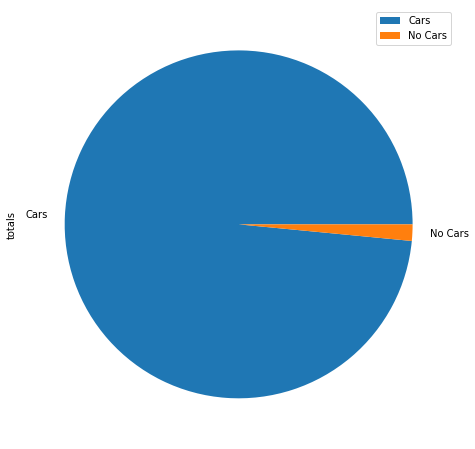

In [71]:

#Creating new df for pie chart and plotting
cars_df = pd.DataFrame({"totals": [cars,no_cars],},
                 index =['Cars','No Cars'])

plot = cars_df.plot.pie(y='totals', figsize=(8,8))

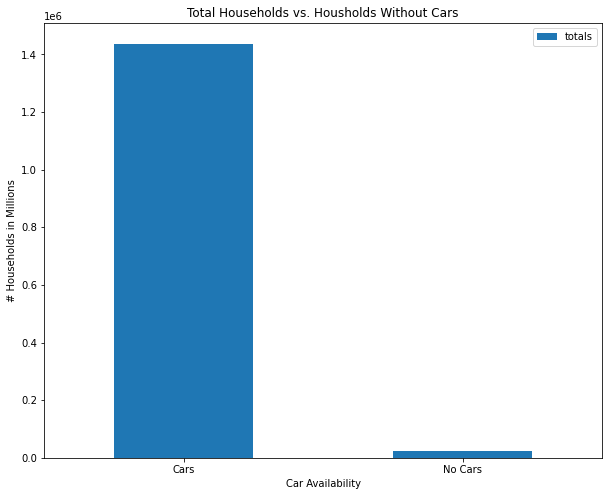

In [87]:
#Create bar chart of car data
cars_bar = cars_df[["totals"]]
cars_bar.plot(kind = "bar", figsize=(10,8), rot = 0)
plt.ylabel("# Households in Millions")
plt.xlabel("Car Availability")
plt.title("Total Households vs. Housholds Without Cars")
plt.savefig("Chart Images/Bar_Cars.png")

In [88]:
urban_stores_cars = urban_stores.sort_values(by = "NoCar LowAccess1mile Share", ascending = False)
urban_stores_cars.head()

,OHU2010,lapop1,LATracts1,lapop1share,LAhalfand10,LATracts20,Urban,NoCar LowAccess1mile,POP2010,LowAccess_LowIncome1mile,...,lapophalf,lapophalfshare,LowAcces_LowIncome05miles,Metro_Atlanta,LowAccess_LowIncome05milesPRCT,Income_Level,Name,NoCar LowAccess1mile Share,LATracts_half,YesCar
480,579,936.000016,1,1.000000,1,0,1,257.093290,936,674.611916,...,936.000016,1.000000,674.611916,ARC 10,0.720739,Low Income,48.00,0.444030,1,321.906710
378,1837,3686.748546,1,0.843264,1,0,1,586.005052,4372,2455.049295,...,4361.267284,0.997545,2860.005355,ARC 10,0.654164,Low Income,87.00,0.319001,1,1250.994948
462,702,1892.999995,1,1.000000,1,0,1,201.796212,1893,1183.345234,...,1892.999995,1.000000,1183.345234,ARC 10,0.625116,Low Income,82.02,0.287459,1,500.203788
528,691,1757.015122,1,0.878508,1,0,1,194.885421,2000,1257.771919,...,1999.999971,1.000000,1417.401281,ARC 10,0.708701,Low Income,83.02,0.282034,1,496.114579
382,1493,1278.367188,1,0.481494,1,0,1,410.055231,2655,907.591459,...,2654.999928,1.000000,1991.338541,ARC 10,0.750033,Low Income,118.00,0.274652,1,1082.944769


In [96]:
#Creating df that shows data related to population data for low access
low_access_df_mr = urban_stores[{"POP2010", "lapop1", "lapop1share"}]
low_access_df_mr.columns = ["Low Acc Pop", "Low Acc. Pop Share",  "Total Pop"]
low_access_df_mr

,Low Acc Pop,Low Acc. Pop Share,Total Pop
0,3105.415489,0.561558,5530
1,3251.804581,0.421600,7713
2,1900.698065,0.417736,4550
3,3217.267229,0.558844,5757
4,3238.999945,1.000000,3239
...,...,...,...
705,6260.021520,0.879340,7119
706,1913.503440,0.228451,8376
707,5667.255401,0.789311,7180
708,10627.521800,0.880856,12065


In [97]:
#Creating variables that total the populations for Total Population and Population with low access
low_access_mr = low_access_df_mr["Low Acc Pop"].sum()
total_pop_mr = low_access_df_mr["Total Pop"].sum()
print(low_access_mr)

1493967.42959937


In [98]:
#Creating the bar chart df
la_table_mr = pd.DataFrame({"Population Count": [low_access_mr, total_pop_mr],},
                         index= ["Low Acc Pop", "Total Pop"])
la_table_mr

,Population Count
Low Acc Pop,1.493967e+06
Total Pop,3.907025e+06


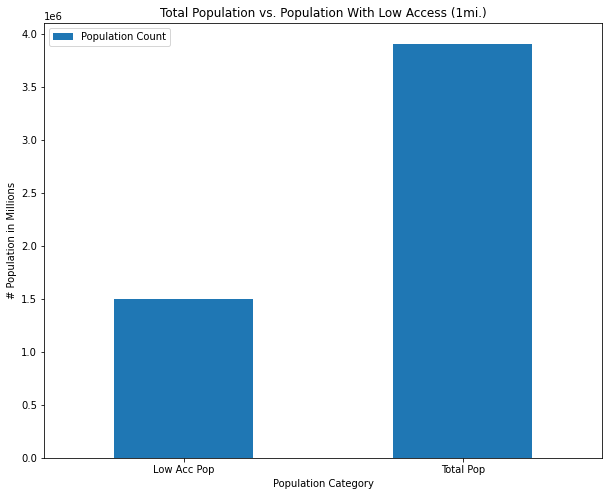

In [100]:
#Creating the bar chart
pop_bar = la_table_mr[["Population Count"]]
pop_bar.plot(kind = "bar", figsize=(10,8), rot=0)
plt.ylabel("# Population in Millions")
plt.xlabel("Population Category")
plt.title("Total Population vs. Population With Low Access (1mi.)")
plt.savefig("Chart Images/Bar_Population.png")